# heat_flux.ipynb

Author: Robert M. Frost

University of Oklahoma

Created 01 August 2023

Purpose: Plot surface heat flux for simulations for manuscript

In [1]:
import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from matplotlib.gridspec import GridSpec

In [2]:
# plotting setup

# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white') 

In [3]:
time = np.linspace(0,16,1152000)
flux = np.empty(len(time))
for i in range(0,720000):
    flux[i] = 0.05
for i in range(720000,936000):
    flux[i] = 0.30
for i in range(936000,1152000):
    flux[i] = 0.05

In [4]:
ds = xr.open_dataset("/home/rfrost/simulations/nc/full_step_9/576000_1152000_stats.nc")
ds["time"] = ds.time / 3600 + 8

In [5]:
# times to be plot in hours
jthr = [9.5, 11, 12.5]
jtall = [abs(ds.time.values - jthr[jt]).argmin() for jt in range(len(jthr))]

## Fig 1

/tmp/ipykernel_23495/2822350556.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


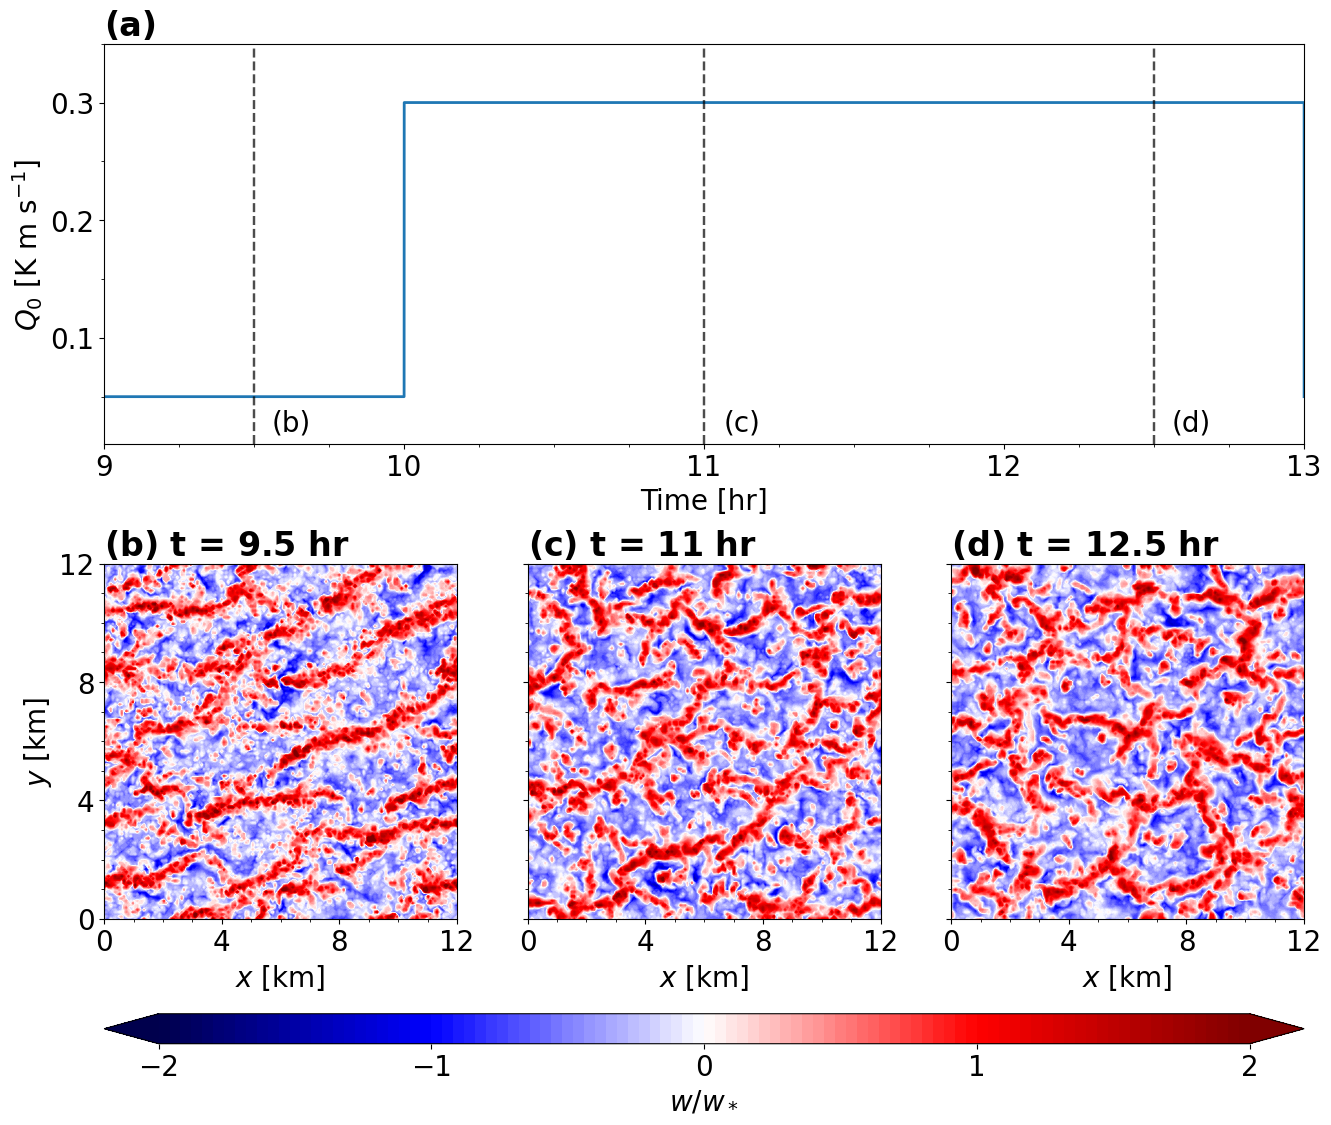

In [6]:
fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(1,1, top=1, bottom=0.6, left=0, right=1)
ax1 = fig.add_subplot(gs1[:,:])
gs2 = GridSpec(1,3, top=0.48, bottom=0.125, left=0, right=1)
ax2 = fig.add_subplot(gs2[0,0])
ax3 = fig.add_subplot(gs2[0,1])
ax4 = fig.add_subplot(gs2[0,2])
gs3 = GridSpec(1,1, top=0.03, bottom=0, left=0, right=1)
ax5 = fig.add_subplot(gs3[:,:])

# heat flux time series
ax1.plot(time, flux, lw=2)
ax1.set_ylim(0.01,0.35)
ax1.set_ylabel("$Q_0$ [K m s$^{-1}$]")
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
ax1.yaxis.set_major_locator(MultipleLocator(0.10))
ax1.set_xlim(9,13)
ax1.set_xlabel("Time [hr]")
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.25))
ax1.axvline(x=jthr[0], c="black", lw=1.75, alpha=0.7, ls="--")
ax1.axvline(x=jthr[1], c="black", lw=1.75, alpha=0.7, ls="--")
ax1.axvline(x=jthr[2], c="black", lw=1.75, alpha=0.7, ls="--")
ax1.text(jthr[0] + 0.125, 0.0275, "(b)", ha="center", va="center")
ax1.text(jthr[1] + 0.125, 0.0275, "(c)", ha="center", va="center")
ax1.text(jthr[2] + 0.125, 0.0275, "(d)", ha="center", va="center")
ax1.set_title("(a)", loc="left")

# contour plots
clevs = np.linspace(-2,2,101)
axes = [ax2, ax3, ax4]
lab = "bcd"
for i in range(len(jtall)):
    jz = abs(ds.z/ds.zi[jtall[i]] - 0.25).argmin()
    w_norm = ds.w[jtall[i],:,:,jz].T / ds.wstar[jtall[i]]
    w_pert = (ds.w[jtall[i],:,:,jz].T - ds.w_mean[jtall[i],jz]) / ds.wstar[jtall[i]]
    cf = axes[i].contourf(ds.x/1000, ds.y/1000, w_norm,
                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
    axes[i].set_title(f"({lab[i]}) $\\bf{{t}}$ = {jthr[i]} hr", loc="left")
    axes[i].xaxis.set_major_locator(MultipleLocator(4))
    axes[i].xaxis.set_minor_locator(MultipleLocator(1))
    axes[i].yaxis.set_major_locator(MultipleLocator(4))
    axes[i].yaxis.set_minor_locator(MultipleLocator(1))
    axes[i].set_xlabel("$x$ [km]")
    # Manually rasterize each collection in the ContourSet
    for collection in cf.collections:
        collection.set_rasterized(True)

ax3.set_yticklabels([]), ax4.set_yticklabels([])

ax2.set_ylabel("$y$ [km]")

cbar = plt.colorbar(cf, cax=ax5, orientation="horizontal")
cbar.set_label("$w/w_*$")
cbar.set_ticks(np.arange(-2, 2.1, 1))

fig.tight_layout()

plt.savefig("/home/rfrost/manuscript_plots/fig1.pdf", format="pdf", dpi=300, bbox_inches="tight")

## Fig 2

In [7]:
# find average T_L at hr 9.8333
T_L = (843.69 + 861.95 + 841.57 + 844.23) / 4
tlmax = max((time-10)*3600/T_L)
tlmin = min((time-10)*3600/T_L)

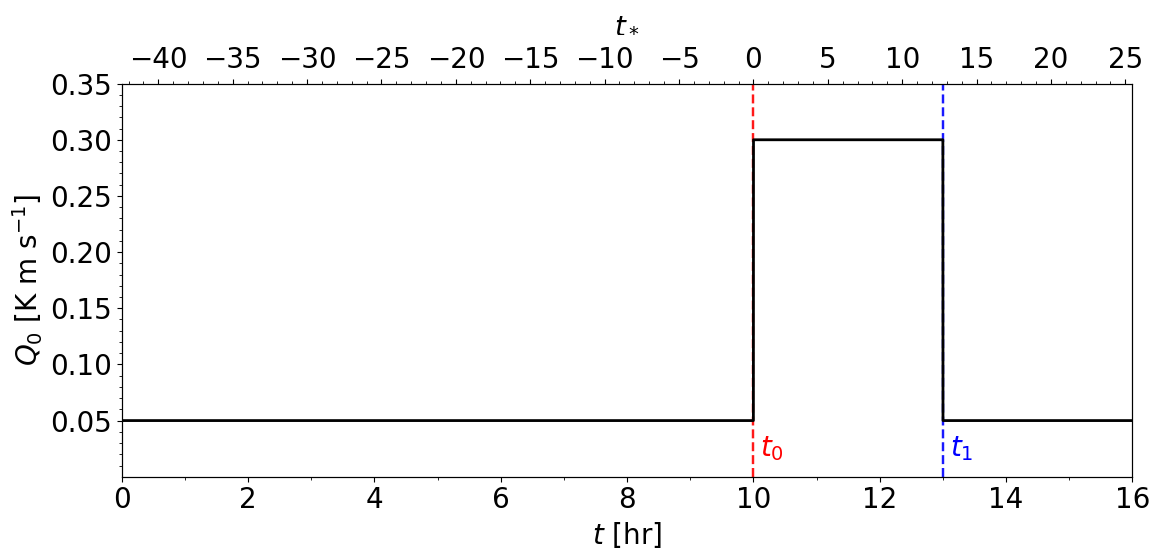

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(time, flux, lw=2, zorder=1, c="black")

ax.set_ylim(0.00001,0.35)
ax.set_xlim(0,16)
ax.set_ylabel("$Q_0$ [K m s$^{-1}$]")
ax.set_xlabel("$t$ [hr]")
ax.axvline(x=10, c="red", lw=1.75, alpha=0.9, ls="--", zorder=0)
ax.axvline(x=13, c="blue", lw=1.75, alpha=0.9, ls="--", zorder=0)
ax.text(10 + 0.3, 0.025, "$t_0$", ha="center", va="center", c="red")
ax.text(13 + 0.3, 0.025, "$t_1$", ha="center", va="center", c="blue")
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax2 = ax.twiny()
ax2.set_xlim(tlmin, tlmax)
ax2.set_xlabel("$t_*$", labelpad=10)
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_minor_locator(MultipleLocator(1))

fig.tight_layout()
plt.savefig("/home/rfrost/manuscript_plots/fig2.pdf", format="pdf", dpi=300, bbox_inches="tight")